## 실제 이미지 읽어들이기 path 함수
- path, os 관련 함수들 사용 이미지 읽어들이기

In [2]:
import tensorflow as tf

import os
from glob import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

train_paths = glob('../dataset/cifar/train/*.png')
test_paths = glob('../dataset/cifar/test/*.png')

print(len(train_paths), len(test_paths))


50000 10000


## OS 함수

In [5]:
path = train_paths[0]
print('path:', path)

print('join 예제 : ', os.path.join('c:','python_jupyter','dl_directory'))
print('해당 파일만 : ',os.path.basename(path))
print('해당 디렉토리만 :', os.path.dirname(path)) # 해당 
print('해당 path가 있냐 없냐 : ',os.path.exists(path)) # 해당 path가 있냐 없나

path: ../dataset/cifar/train\0_frog.png
join 예제 :  c:python_jupyter\dl_directory
해당 파일만 :  0_frog.png
해당 디렉토리만 : ../dataset/cifar/train
해당 path가 있냐 없냐 :  True


## 데이터 만 보고 Class 라벨 만들어주기

In [9]:
def get_class_name(path):
    fname = os.path.basename(path) # 현재 파일명 가져오기
    cls_name = fname.replace('.png','').split('_')[-1]
    return cls_name

print(path) # 현재 파일 name
cls_name = get_class_name(path)
print(cls_name)


../dataset/cifar/train\0_frog.png
frog


## Class 갯수 확인

In [20]:
# 파일이름 파싱해서 넣기
class_names = [get_class_name(path) for path in train_paths]
print(len(class_names))
print(np.unique(class_names, return_counts= True)) # 각 클래스별로 몇개씩 있나 까지
print(len(set(class_names)))

50000
(array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10'), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
      dtype=int64))
10


(array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10'), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
      dtype=int64))


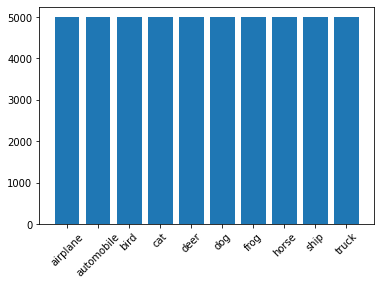

In [13]:
uniques = np.unique(class_names, return_counts=True)
print(uniques)

plt.bar(*uniques) # (1,1) 을 풀어서 넣은 것처럼됨
plt.xticks(rotation=45)
plt.show()

In [21]:
# train data - dataframe 으로 넣기
train_df = pd.DataFrame(columns=['name','class'],
                    data = {'name':train_paths, 'class':class_names}
                   )
train_df.head()

,name,class
0,../dataset/cifar/train\0_frog.png,frog
1,../dataset/cifar/train\10000_automobile.png,automobile
2,../dataset/cifar/train\10001_frog.png,frog
3,../dataset/cifar/train\10002_frog.png,frog
4,../dataset/cifar/train\10003_ship.png,ship


## Test data에 대해 진행

In [24]:
# Test data 에 대해 진행
print(len(test_paths))

# 파일이름 파싱해서 넣기
test_class_names = [get_class_name(path) for path in test_paths]
print(np.unique(test_class_names, return_counts= True)) # 각 클래스별로 몇개씩 있나 까지
print(len(set(test_class_names)))

10000
(array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10'), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))
10


In [23]:
# test data - dataframe 으로 넣기
test_df = pd.DataFrame(columns=['name','class'],
                    data = {'name':test_paths, 'class':test_class_names}
                   )
test_df.head()

,name,class
0,../dataset/cifar/test\0_cat.png,cat
1,../dataset/cifar/test\1000_dog.png,dog
2,../dataset/cifar/test\1001_airplane.png,airplane
3,../dataset/cifar/test\1002_ship.png,ship
4,../dataset/cifar/test\1003_deer.png,deer


In [27]:
## 만들어진 DataFrame 저장
train_csv_path = 'cifar_trainset.csv'
test_csv_path = 'cifar_testset.csv'

train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

print('csv 변환 완료')

csv 변환 완료
